In [2]:
import os
from utils_dataset import create_combined_mnist_dataset_with_masks, CombinedMNISTDataset, get_loaders
from torchvision import transforms
import matplotlib.pyplot as plt

In [4]:
output_dir = "./combined_mnist_dataset"
num_samples = 500000  # Number of combined images to create

if not os.path.exists(output_dir):  
    create_combined_mnist_dataset_with_masks(output_dir, num_samples, seed=0)

transform = transforms.Compose([transforms.ToTensor()])
dataset = CombinedMNISTDataset(data_dir=output_dir, transform=transform)

In [9]:
train_dataset, val_dataset, test_dataset = get_loaders(output_dir, num_samples, get_sets="splits")

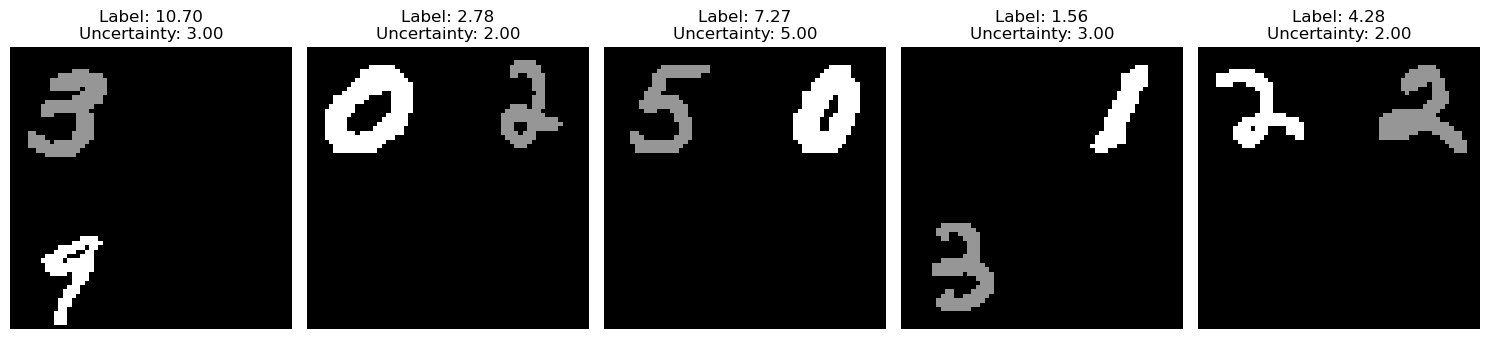

In [10]:
# Visualize some samples from the Dataset
num_samples_to_plot = 5  # Number of images to plot

# Extract samples from the dataset
images, labels, uncertainties = [], [], []
for i in range(num_samples_to_plot):
    image, label, uncertainty, _, _ = train_dataset[i]
    images.append(image.squeeze().numpy())  # Remove channel dimension for plotting
    labels.append(label.item())
    uncertainties.append(uncertainty.item())

# Plot the images
fig, axes = plt.subplots(1, num_samples_to_plot, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap="gray")
    ax.set_title(f"Label: {labels[i]:.2f}\nUncertainty: {uncertainties[i]:.2f}")
    ax.axis("off")

plt.tight_layout()
plt.show()